# Estimating Probability of Debt Default

In [2]:
# Import Python libraries
import numpy as np
import pandas as pd

# Create a dataframe for your bond analysis
bonds = pd.DataFrame(index=['Default', 'No Default'])

# The prior probability of default
# P(Default) = 0.10 and P(No Default) = 0.90

bonds['Prior'] = 0.10, 0.90

# The likelihood functions for observing negative ratings
# P(Negative|Default) = 0.70 and P(Negative|No Default) = 0.40

bonds['Likeli_Neg'] = 0.70, 0.40

# Joint probabilities of seeing a negative rating depending on
# default or no default
# P(Negative|Default) * P(Default) and P(Negative|No Default) * P(No Default)

bonds['Joint1'] = bonds['Likeli_Neg'] * bonds['Prior']

# Add the joint probabilities to get the marginal likelihood or unconditional
# probability of observing a negative rating
# P(Negative) = P(Negative|Default) * P(Default) + P(Negative|No Default) * P(No Default)

prob_neg_data = bonds['Joint1'].sum()

# Use the inverse probability rule to calculate the updated probability of
# default based on the new negative rating and then print the data table.

bonds['Posterior1'] = bonds['Likeli_Neg'] * bonds['Prior']/prob_neg_data
bonds.round(2)

,Prior,Likeli_Neg,Joint1,Posterior1
Default,0.1,0.7,0.07,0.16
No Default,0.9,0.4,0.36,0.84


In [3]:
#Our new prior probability is our previous posterior probability, Posterior1.
#Compute and print the table.

bonds['Joint2'] = bonds['Likeli_Neg'] * bonds['Posterior1']
prob_neg_data = bonds['Joint2'].sum()
bonds['Posterior2'] = bonds['Likeli_Neg'] * bonds['Posterior1']/prob_neg_data
bonds.round(2)

,Prior,Likeli_Neg,Joint1,Posterior1,Joint2,Posterior2
Default,0.1,0.7,0.07,0.16,0.11,0.25
No Default,0.9,0.4,0.36,0.84,0.33,0.75


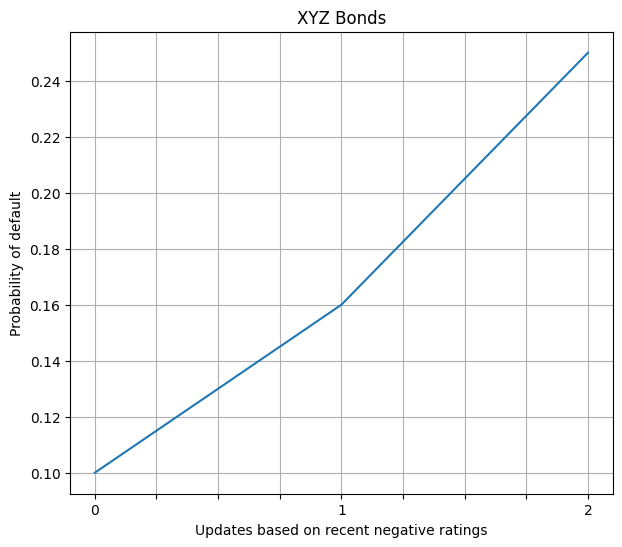

In [5]:
# Create a new table so that you can plot a graph with the appropriate information
table = bonds[['Prior', 'Posterior1', 'Posterior2']].round(2)

# Change columns so that x axis is the number of negative ratings
table.columns = ['0', '1', '2']

# Select the row to plot in the graph and print it.
default_row = table.iloc[0]
default_row.plot(figsize = (7,6), grid = True,
xlabel = 'Updates based on recent negative ratings',
ylabel = 'Probability of default', title = 'XYZ Bonds');